# Simple Autoencoder

In this notebook, we will build our first simple autoencoder. This will take in three-dimensional data, encode it to two dimensions, and decode it back to 3D.

## Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Prepare and preview the dataset

We will first create a synthetic dataset to act as input to the autoencoder.

In [ ]:
def generate_data(m):
    '''plots m random points on a 3D plane'''

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)

    return data

<ipython-input-3-bc7ef430a1f4>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds');


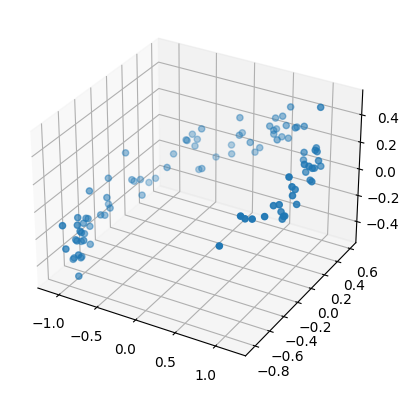

In [ ]:
# Use the function generate data points
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

# Preview the data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds');

## Build the Model

Now we will build the simple encoder-decoder model. Notice the number of neurons in each Dense layer. The model will contract in the encoder and then expand in the decoder.

In [ ]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

autoencoder = keras.models.Sequential([encoder, decoder])

## Compile the Model

In [ ]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

## Train the Model

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 2s 10ms/step - loss: 0.6493
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 0.6061
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 0.5691
Epoch 4/200
4/4 [==============================] - 0s 17ms/step - loss: 0.5326
Epoch 5/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4973
Epoch 6/200
4/4 [==============================] - 0s 23ms/step - loss: 0.4678
Epoch 7/200
4/4 [==============================] - 0s 25ms/step - loss: 0.4476
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.4279
Epoch 9/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4132
Epoch 10/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3958
Epoch 11/200
4/4 [==============================] - 0s 10ms/step - loss: 0.3806
Epoch 12/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3684
Epoch 13/200
4/4 [==============================] -

## Plot the encoder output

In [ ]:
# Encode the data
codings = encoder.predict(X_train)

# Print a sample input-encoder output pair
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

4/4 [==============================] - 0s 4ms/step
input point: [0.04869792 0.42741523 0.16201584]
encoded point: [-0.03348508 -0.14360166]


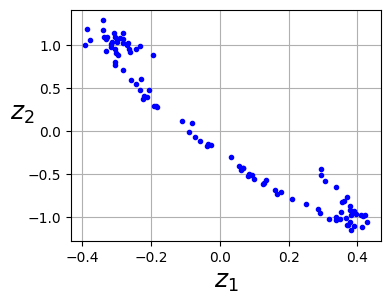

In [ ]:
# Plot all encoder outputs
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## Plot the Decoder output

The decoder then attempts to reconstruct the original input. If we observe the outputs below we can see that although not perfect, the reconstruction still maintains the general shape of the original input.

In [ ]:
# Decode the encoder output
decodings = decoder.predict(codings)

# Print a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

4/4 [==============================] - 0s 3ms/step
input point: [0.04869792 0.42741523 0.16201584]
encoded point: [-0.03348508 -0.14360166]
decoded point: [0.09995865 0.10214298 0.1027246 ]


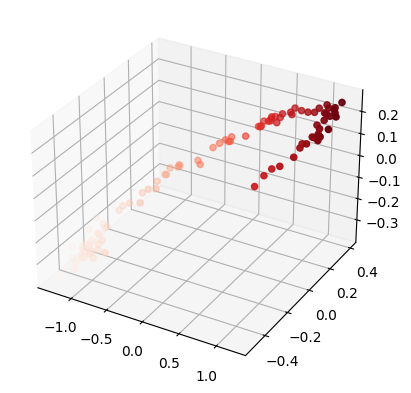

In [ ]:
# Plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');